# Project Euler: Problem 186 - Connectedness of a network

### Problem Description 
(This problem can be found https://projecteuler.net/problem=186) <br>
We are goiing to think about the records from a busy telephone system with one million users. <br>

The telephone number of the caller and the called number in record $n$ are $Caller(n) = S_{2n-1}$ and $Called(n) = S_{2n}$ where $S_{1,2,3...}$ come from the "Lagged Fibonacci Generator": <br>
For $1 \leq k \leq 55, S_k = [100003 - 200003k + 300007k^3]$ (modulo 1000000) <br>
For $56 \leq k, S_k = [S_{k-24} + S_{k-55}]$ (modulo 1000000) <br>

If Caller(n) = Called(n) then the user is assumed to have misdialled and the call fails; otherwise the call is successful.

From the start of the records, we say that any pair of users X and Y are friends if X calls Y or vise-versa. Similarily, X is a friend of a friend of Z if X is a friend of Y and Y is a friend of Z; and so on for longer chains.

The Prime Minister's phone number is 524287. After how many successful calls, not counting misdials, will 99% of the users (including the PM) be a friend, or a friend of a friend etc., of the Prime Minister?

### Solution

In [59]:
import networkx as nx
import numpy as np

In [53]:
# Generate the records of telephone calls
def LFG(k):
    # Lagged Fibonacci Generator
    return 100003 - 200003*k + 300007*(k**3)

def get_record(n):
    # n: Record Number
    numbers = [] # container for caller and called numbers
    for k in [2*n-1,2*n]:
        if 1 <= k <= 55:
            Sk = LFG(k)
        elif k >= 56:
            Sk = LFG(k-24) + LFG(k-55)
        numbers.append(Sk % 1000000)
    return numbers # return caller and called numbers

In [23]:
get_records(3)

[600863, 701497]

### Solution 1: this takes a too long time and is not a feasible solution (gave up on running this until it finds the solution)

In [105]:
# calculate answer
n = 1 # Record Number
n_success = 0 # the number of successful phone calls
n_user = 1000000
PM = 524287
g = nx.Graph()
frac = [0] # fraction of the number of PM's friends among the all users 
while frac[-1] < 0.99:
    caller, called = get_record(n)
    if caller != called: # if the call is successful
        g.add_edge(caller,called)
        n_success += 1
    
        if PM in g.nodes(): # if PM's number is on the record
            n_friends = len(nx.node_connected_component(g,PM)) 
                #n_friends: the number of (direct or indirect) friends of PM
            frac.append(n_friends / float(u_user))
            if frac[-1] >= 0.99:
                print(n_success)
                break
        else:
            frac.append(0)
    n += 1

KeyboardInterrupt: 

In [58]:
PM in g.nodes()

False

### Solution 2: Use stochastic simulation. Even with this, very small sampling number was possible (tried 10).

As Lagged Fibonacci Generator is a pseudorandom number generator, I will interpret the question as "how many random creation of edges (excluding self-loop generations) are required to connect all of nodes in a network of one million nodes?"

In [107]:
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
def calc(n_node):
    g = nx.Graph()
    g.add_nodes_from(range(n_node))
    g.add_edge(0,1)
    while not nx.is_connected(g):
        n1,n2 = np.random.choice(g.nodes(),2,replace=False)
        if (n1,n2) not in g.nodes():
            g.add_edge(n1,n2)
    return len(g.edges())

x = [] # the number of nodes
y = [] # the average number of edges required to connnect the network
for n_node in [100,300,500,700,900]:
    for i in range(10):
        x.append(n_node)
        y.append(calc(n_node))

<IPython.core.display.Javascript object>


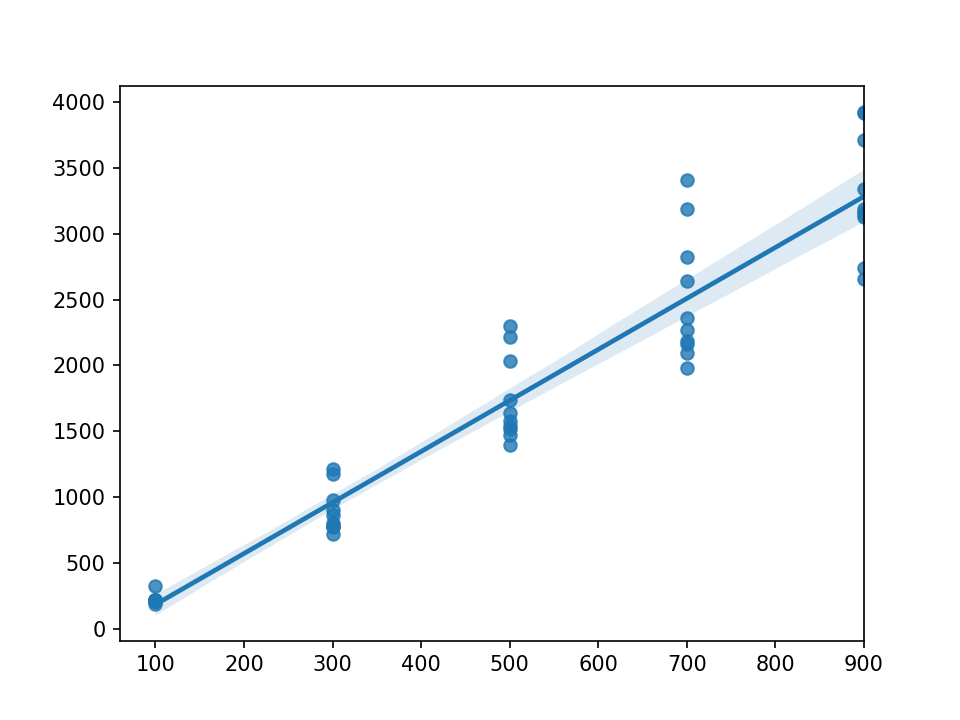

In [126]:
sns.regplot(x,y,x_ci='sd')

<IPython.core.display.Javascript object>


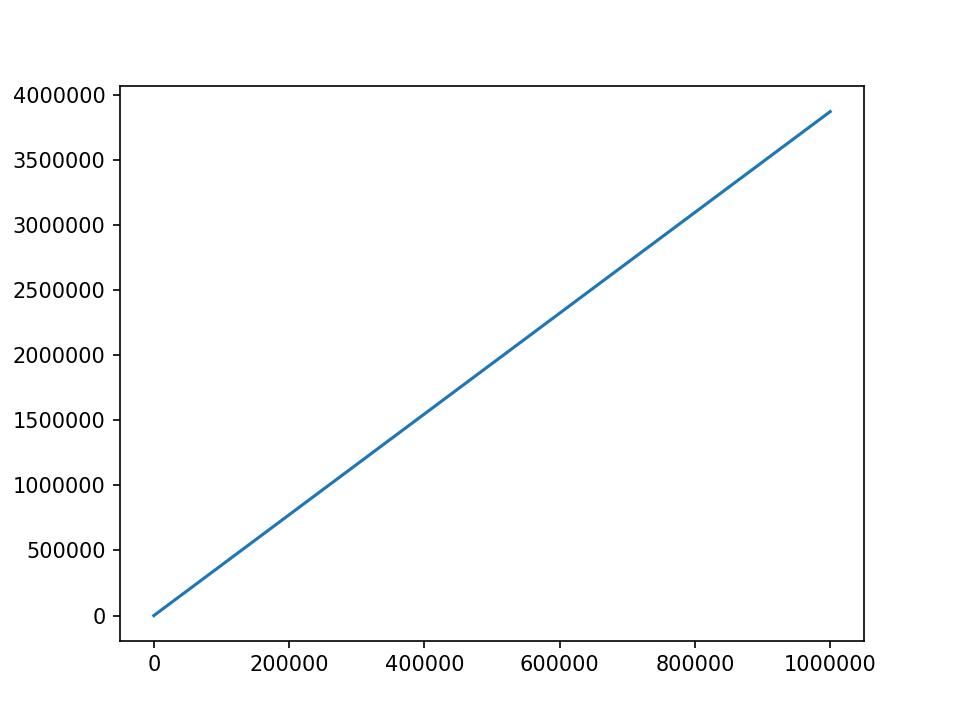

It takes about 3868749.7850000006 successful phone calls to connect one million users


In [146]:
z = np.polyfit(x,y,1) # the third argument is to specify the dimension in the polynomial fitting.
p = np.poly1d(z) # p(xp) gives the function of the regression for values in xp
xp = np.linspace(min(x),1000000,100)
plt.plot(xp, p(xp), '-')
print("It takes about {0} successful phone calls to connect one million users".format(p(1000000)))

In [147]:
#np.savetxt("output_X.txt",x,delimiter=' ')
#np.savetxt("output_Y.txt",y,delimiter=' ')